**Centro de investigación en Matemáticas A.C**

**Temas Selectos en Estadística**

**Hairo Ulises Miranda Belmonte**

**Tarea 3.  Ley del semicírculo de Wigner**

**31 de Agosto del 2019**

## Ejercicio 1. Densidad espectral promedio y Ley de semícirculo de Wigner

Generar $m = 10000$ matrices para las dimensiones $p \in {10, 100}$, y producir los histogramas normalizados de la muestra completa de $m × p$ valores propios. Para obtener los histogramas normalizados, se deben escalar por el factor $1/\sqrt(\beta p)$ donde β = 1, 2, 4, para el caso GOE, GUE, y GSE; respectivamente. Compare con el resultado teórico $\rho(x) = \frac{1}{\pi}\sqrt(2-x^2)$, llamada ley del semicírculo de Wigner. Se tienen los siguiente resultados análiticos para las cotas del soporte de las distribuciones que generará:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

* Parámetros

Se generarán 10000 simulacióne para matrices aleatorias de dimensión 10 y 100, cuyas entradas son variables aleatorias con distribución normal y parámetros $\mu = 0$ y $\sigma^2 = 1$.

In [10]:
m = 10000          # número de simulaciones
p = [10,100]       # dimensión de la matriz
beta = [1,2,4]     # betas de factor

### Ensamble ortogonal gaussiano (GOE)

$$H_{ij}\sim N(0,1)$$

$$H = (H + H')/2$$

* Funciones auxiliares

In [11]:
##############
# Funciones 
##############
# x = p
matriz = lambda x : np.random.normal(0, 1, (x,x)) # genera matrices aleatorias
# x = beta
# y = p
factor = lambda x, y : 1./(np.sqrt(x*y))          # factor de escalamiento

simetrica = lambda x: (x + x.T)/2

* Se define la función GEO

In [12]:
def goe(m, p): 
    GOE = []
    for i in range(m):
            H = matriz(p)
            H_sc = simetrica(H)
            v, w = np.linalg.eigh(H_sc)
            GOE.append(v.tolist())
    GOE_eigen = [val for sublist in GOE for val in sublist]
    return GOE_eigen

* Simulación

In [13]:
X1 = []   
for j in range(len(p)):
    caso_1 = factor(beta[0],p[j])
    resultado_goe = goe(m,p[j])
    x1 = [resultado_goe[i]*caso_1 for i in range(len(resultado_goe))]
    X1.append(x1)

* Visualización 

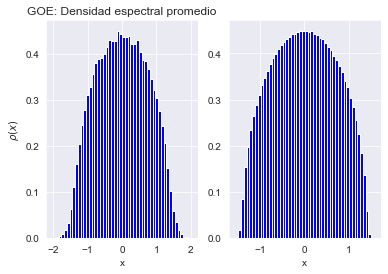

In [14]:
plt.subplot(1, 2, 1)
plt.hist(X1[0], density=True, bins = 50, color="b") 
plt.title('GOE: Densidad espectral promedio')
plt.ylabel(r'$\rho(x)$')
plt.xlabel('x')

plt.subplot(1, 2, 2)
plt.hist(X1[1], density=True, bins = 50, color="b")
plt.xlabel('x')


plt.show()


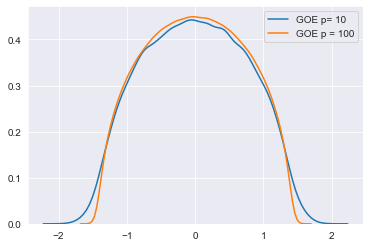

In [15]:
sns.distplot(X1[0], hist = False, kde = True,label="GOE p= 10")
sns.distplot(X1[1], hist = False, kde = True,label="GOE p = 100")

Se puede apreciar la simetría de la distribución espectral, indicando que la mitad de los valores propios de la matriz son positivos, la otra mitad negativos. Además vemos, que al ser $p = 100$, i.e, P grande, la figura de la distribución espectral media, tiende a la ley del semicirculo de Wigner. 


### Ensamble unitario gaussiano (GUE)

Elementos Reales en la diagonal y complejos todos los demás, al convertirla en simétrica. Se genra una matríz aleatoria hermitiana $H$, cuya parte real proviene de variables aleatorias normales con $\mu=0$ y $\sigma^2=1$. Se simetriza de la forma:

$$H = ( H + H^\dagger )/2$$

$H^\dagger$: transpuesta conjugada de matriz compleja

* Funciones auxiliares

In [16]:
def matriz_hermitiana(p):
    x = np.matrix(matriz(p))
    z = x - 1j*x
    Hsc_hermitiana = (z + z.getH())/2
    return Hsc_hermitiana

def gue(m, p): 
    GUE= []
    for i in range(m):
            H_sc = matriz_hermitiana(p)
            v, w = np.linalg.eigh(H_sc)
            GUE.append(v.tolist())
    GUE_eigen = [val for sublist in GUE for val in sublist]
    return GUE_eigen

* Simulación

In [17]:
X2 = []   
for j in range(len(p)):
    caso_2 = factor(beta[1],p[j])
    resultado_gue = gue(m,p[j])
    x2 = [resultado_gue[i]*caso_2 for i in range(len(resultado_gue))]
    X2.append(x2)

* Visualización

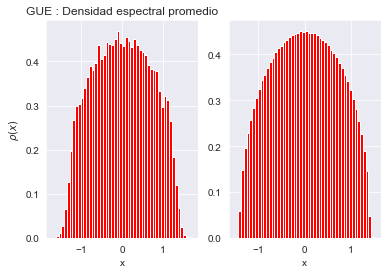

In [18]:
plt.subplot(1, 2, 1)
plt.hist(X2[0], density=True, bins = 50, color="r") 
plt.title('GUE : Densidad espectral promedio')
plt.ylabel(r'$\rho(x)$')
plt.xlabel('x')

plt.subplot(1, 2, 2)
plt.hist(X2[1], density=True, bins = 50, color="r")
plt.xlabel('x')


plt.show()

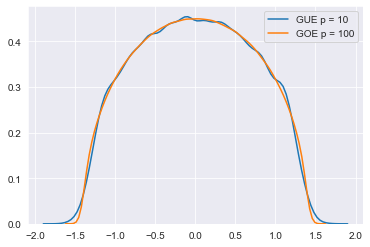

In [19]:
sns.distplot(X2[0], hist = False, kde = True,label="GUE p = 10")
sns.distplot(X2[1], hist = False, kde = True,label="GOE p = 100")
plt.show()

Vemos que se aproxima al ensamble ortogonal gaussiano (GOE). Incluso si utilizamos los rango teoricos podemos observar que para el caso GUE se tiene $[-\sqrt(2\beta p), +\sqrt(2\beta p)]$ que aproximadamente nos da, para el caso GUE con $\beta=2$ y $p=10$ un valor de $ \sqrt(2*2*10)\approx 6$, con con $\beta=2$ y $p=100$ un valor de $\sqrt(2*2*10)\approx 20$; sin embargo, el factor de normalización al aplicarlo a los valores propios antes de realizar el histograma hace que cuando P sea muy grande los rangos del intervalo no se comporten de esa manera, acotandolos.

### Ensemble simpletico gaussiano (GSE).

$$
H_{2px2p}=\left(\begin{array}{cc} 
X & Y\\
-Y^* & X^*
\end{array}\right)
$$ 

$X$: matriz de elementos complejos, cuyas partes reales son v.a. con distribución normal $\mu=0$ y $\sigma^2=1$

$Y$: matriz de elementos complejos, cuyas partes reales son v.a. con distribución normal $\mu=0$ y $\sigma^2=1$

$Y^*$: matriz conjugada de Y

$X^*$: matriz conjugada de X

* Simetrización

$$H = (H + H')/2$$

* Funciones auxiliares

In [47]:
def matriz_simplectica(p):
    x = np.matrix(matriz(p)) - 1j*np.matrix(matriz(p))
    y = np.matrix(matriz(p)) - 1j*np.matrix(matriz(p))
    x_conj = np.conj(x)
    y_conj = np.conj(y)
    H = np.block([[x, y], [-y_conj, x_conj]]) # matriz por bloques
    return (H + H.getH())/2

def gse(m, p): 
    GSE = []
    for i in range(m):
            H_sc = matriz_simplectica(p)
            v, w = np.linalg.eigh(H_sc)
            GSE.append(v.tolist())
    GSE_eigen = [val for sublist in GSE for val in sublist]
    return GSE_eigen

* Simulación

In [48]:
X3 = []   
for j in range(len(p)):
    caso_3 = factor(beta[2],p[j])
    resultado_gse = gse(m,p[j])
    x3 = [resultado_gse[i]*caso_3 for i in range(len(resultado_gse))]
    X3.append(x3)

* Visualización

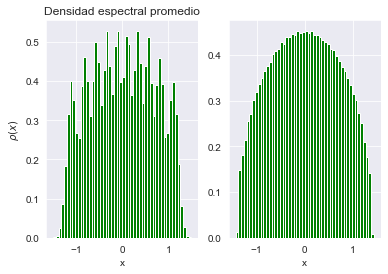

In [49]:
plt.subplot(1, 2, 1)
plt.hist(X3[0], density=True, bins = 50, color="g") 
plt.title('Densidad espectral promedio')
plt.ylabel(r'$\rho(x)$')
plt.xlabel('x')

plt.subplot(1, 2, 2)
plt.hist(X3[1], density=True, bins = 50, color="g")
plt.xlabel('x')

plt.show()

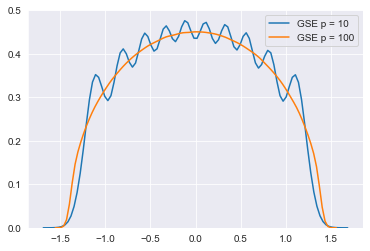

In [50]:
sns.distplot(X3[0], hist = False, kde = True,label="GSE p = 10")
sns.distplot(X3[1], hist = False, kde = True,label="GSE p = 100")

Con el ensamble GSE, al tener una dimensión pequeña se observa que sus valores propios, una vez simetrizada, son menores respecto a los ensambles GOE y GUE.

### Resultado teórico Ley del semicírculo de Wigner

* Función

$$\rho(\lambda)=\frac{1}{\pi}\sqrt(2-x^2)$$

In [51]:
grid = np.linspace(-1.414,1.414,1000)
X4 = []
for i in range(len(grid)):
    X4.append((1/np.pi)*np.sqrt(2-grid[i]**2))

* Visualización

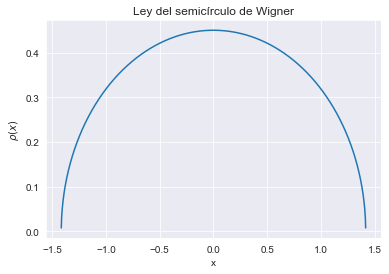

In [52]:
plt.plot(grid, X4)
plt.title('Ley del semicírculo de Wigner')
plt.ylabel(r'$\rho(x)$')
plt.xlabel('x')
plt.show()

Se observa el semicírculo de la densidad espectral, i.e, la marginal de la jpdf espectral

* **Visualización GOE, GUE, GSE y Wigner**

#### Tamaño de la matrices p = 10


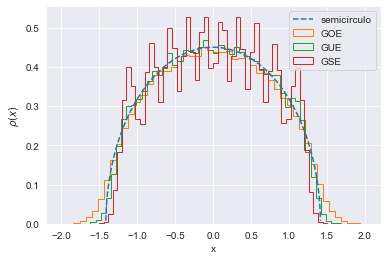

In [53]:
plt.plot(grid, X4,  "--" , label="semicírculo")
plt.hist(X1[0], density=True, bins = 50, histtype='step', label="GOE")
plt.hist(X2[0], density=True, bins = 50, histtype='step', label="GUE")
plt.hist(X3[0], density=True, bins = 50, histtype='step', label="GSE")

plt.ylabel(r'$\rho(x)$')
plt.xlabel('x')
plt.legend()
plt.show()

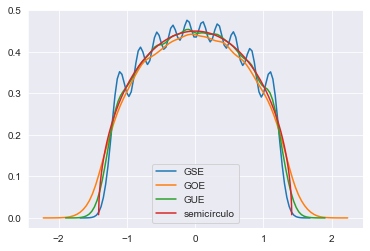

In [54]:
sns.distplot(X3[0], hist = False, kde = True,label="GSE")
sns.distplot(X1[0], hist = False, kde = True,label="GOE")
sns.distplot(X2[0], hist = False, kde = True,label="GUE")
sns.lineplot(grid, X4, label="semicírculo")

plt.show()

Se observa que las distribuciones que más se acercan a la ley de semicirculo de Wigner, son  la GUE y GOE. El ensamble GSE se encuentra lejos de tener distribución aproximada de semicírculo.


#### Tamaño de las matrices p = 1000

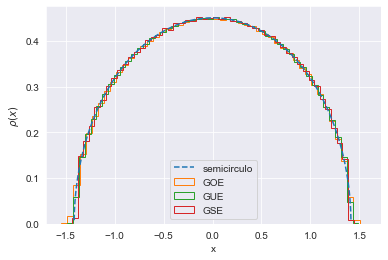

In [55]:
plt.plot(grid, X4,  "--" , label="semicirculo")
plt.hist(X1[1], density=True, bins = 50, histtype='step', label="GOE")
plt.hist(X2[1], density=True, bins = 50, histtype='step', label="GUE")
plt.hist(X3[1], density=True, bins = 50, histtype='step', label="GSE")

plt.ylabel(r'$\rho(x)$')
plt.xlabel('x')
plt.legend()
plt.show()

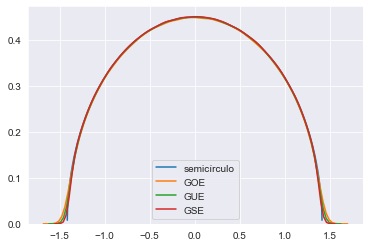

In [56]:
sns.lineplot(grid, X4, label="semicírculo")
sns.distplot(X1[1], hist = False, kde = True,label="GOE")
sns.distplot(X2[1], hist = False, kde = True,label="GUE")
sns.distplot(X3[1], hist = False, kde = True,label="GSE")

plt.show()

Incrementando la dimensión de la matriz, se genera un número mayor por simulación de valores propios, que aproximan mejor a la distribución del semicírculo.

**¿Es posible calcular análiticamente la forma de estos histogramas?**

* Sí, utilizando una p (dimension de la matriz aleatoria) finita se puede obtener la función de distribución que genera la forma de los histogramas. Para eso se debe realizar el calculo de la probabilidad marginal de la densidad espectral conjunta, la cual puede realizarse por medio del conteo de dirac, que en teoría es una media, obteniendo así la densidad espectral media, denotada como: $\langle n(\lambda) \rangle = \rho(\lambda)$

**¿Qué pasa si p se vuelve muy grande?**

* Con estos dos ejemplos se observa que conforme incrementa la dimensión de la matrix, i.e., "p" crece, el histograma se aproxima a la forma de la ley del semicirculo de Wingner.

Nota: No se realizar un ejemplo para "p" mayor a cien por problemas de procesamiento; no obstantem con $p=100$, se aprecia la tendencia a aproximarce a la ley del semicírculo.

## Ejercicio 2. Conjetura de Wigner

Graficar la distribución de espaciamiento contiguos (ordenando los eigenvalores) para un ensemble de $m = 1000$ matrices simétricas de dimensión $100 × 100$ ($H_{s100×100}$ ).

Sobreponer a la simulación el resultado de la conjetura de Wigner para una
matriz del GOE de $2 × 2$ (obtenido en clase). ¿Existe concordancia aún y cuando el desarrollo analítico fue hecho para p = 2 ¿Cómo la mediría?

$$̄p(s) = \hat s p(\hat s s),$$

Se le conoce como espaciamiento promedio de niveles. 

Para el caso GOE se tiene que:

$$\bar p(s) = \frac{\pi s}{2}e^{\frac{-\pi s^2}{4}}$$

* Función

Genera una matriz aleatoria con elementos que se distribuyen normal con media cero y varianza de uno. Se simetriza, y toman sus valore propios. Se ordenan los valore propios y se resta el valor más alto respecto al que le sigue, en una ventana movil de espacio uno.

In [85]:
def S(m, p): 
    X = []
    for i in range(m):
            H = np.random.normal(0, 1, (p,p))   # Generar matrix aleatoria
            H_sc = simetrica(H)                 # Simetrizando
            v, w = np.linalg.eigh(H_sc)         # Valores propios de la matriz simétrica
            eigen = np.sort(v)[::-1]            # ordenar de mayoe a menor
            s = []    
            for j in range(1, len(eigen)):
                value =  eigen[j - 1] - eigen[j] # Diferencia (espacions contiguos)
                s.append(value)
            X.append(s)
    X_eigen = [val for sublist in X for val in sublist]
    return X_eigen


* Simulación

In [86]:
m = 1000 # simulaciones
p = 100  # dimensión de la matriz
S_simulacion = S(m,p)


* Visualización

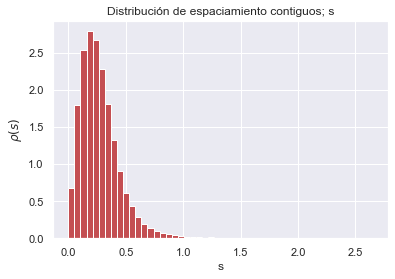

In [91]:
plt.hist(S_simulacion, density=True, bins = 50, color = "r")
plt.title("Distribución de espaciamiento contiguos; s")
plt.ylabel(r'$\rho(s)$')
plt.xlabel('s')
plt.show()

Se presenta el resultad de la simulación con p=100. Cabe resaltar que los valores exceden a un intervalo de cero a dos de la aproximación de la densidad espectral promedio  del espaciamiento $\rho(s)$.

* Conjetura de Wigner para una matriz del GOE de $2 × 2$

Se genera la conjetura de Wigner conforme la demostración en clase. La conjetura de Wigner teórica es:

In [98]:
W = []
s = np.linspace(0,4,1000)
for i in range(len(s)): 
    W.append(((np.pi*s[i])/2)*np.exp((-np.pi*s[i]**2)/4))

* Visualización

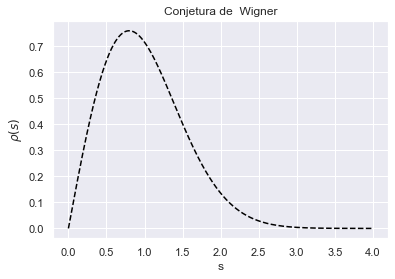

In [99]:
plt.plot(s, W,  "--", color = "black")
plt.title("Conjetura de  Wigner")
plt.ylabel(r'$\rho(s)$')
plt.xlabel('s')
plt.show()

* Simulación y Conjetura de Wigner

Se agruega el valor teórico a la simulación

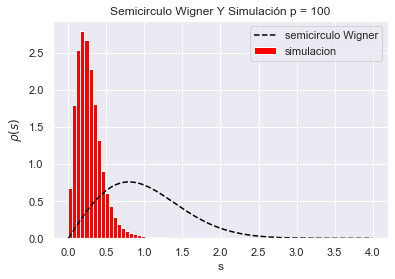

In [100]:
plt.hist(S_simulacion, density=True, bins = 50, label ="simulacion", color ="red")
plt.plot(s, W,  "--", label = "semicirculo Wigner", color = "black")
plt.title("Semicirculo Wigner Y Simulación p = 100")
plt.ylabel(r'$\rho(s)$')
plt.xlabel('s')
plt.legend()
plt.show()

Se puede observar que con p = 100, la simulación no se aproxima a la generalización descrita para p = 2.

* Se reduce "p" a dimensión $8x8$

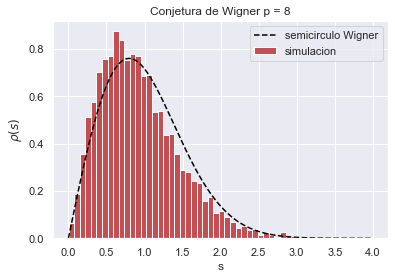

In [103]:
m = 1000
p = 8
S_simulacion = S(m,p)

plt.hist(S_simulacion, density=True, bins = 50, label ="simulacion", color ="r")
plt.plot(s, W, "--", label = "semicirculo Wigner", color ="black")
plt.title("Conjetura de Wigner p = 8")
plt.ylabel(r'$\rho(s)$')
plt.xlabel('s')
plt.legend()
plt.show()

Reduciendo la dimensión en las matrices aleatorias que se generan en la simulación, se observa que con $p=8$, la distribución se aproxima a la ley de semicírculo de Wigner.

Tener una distancia entre los valore propios que sea pequeña, nos indica que la probabilidad de que dos valores propios se encuente cerca es practicamente cero


Ejercicios de Python en Github:
https://nbviewer.jupyter.org/github/hairo1421/Maestria-Computo-Estadistico/blob/master/05%20-%20Tercer%20Semestre%20Temas%20en%20Estad%C3%ADstica/Matrices%20Aleatorias/Tarea%203%20Ley%20del%20semic%C3%ADrculo%20de%20Wigner%20.ipynb  

Ensayo:
https://github.com/hairo1421/Maestria-Computo-Estadistico/blob/master/05%20-%20Tercer%20Semestre%20Temas%20en%20Estad%C3%ADstica/Matrices%20Aleatorias/Tarea_3_Matrices_Aleatorias_Ensayo.pdf
  